In [1]:
from matplotlib import pyplot as plt
import xarray as xr
import pandas as pd

In [10]:
merra = pd.read_csv('../merra-2/merra_60S_10hPa.txt', delim_whitespace=True, skiprows=(0,2,3,4,5), parse_dates=True)
merra.info()

FileNotFoundError: [Errno 2] No such file or directory: '../merra-2/merra_60S_10hPa.txt'

In [3]:
ds = merra.to_xarray()

ds = ds.rename({'index':'date'})

# set attributes
ds['U'].attrs['units']='m/s'
ds['U'].attrs['long_name']='zonal mean zonal wind 60N 10hPa'
ds['Tmin'].attrs['units']='K'
ds['Tmin'].attrs['long_name']='Minimum temperature 50-90 N 10 hPa'
ds.attrs['source']='MERRA-2'

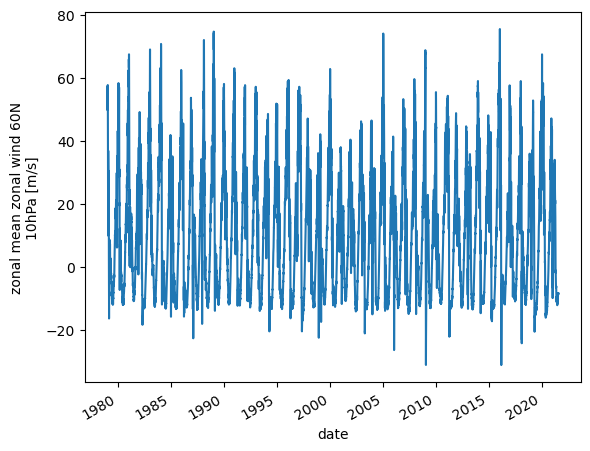

In [4]:
# plot all years
ds['U'].plot()
plt.show()

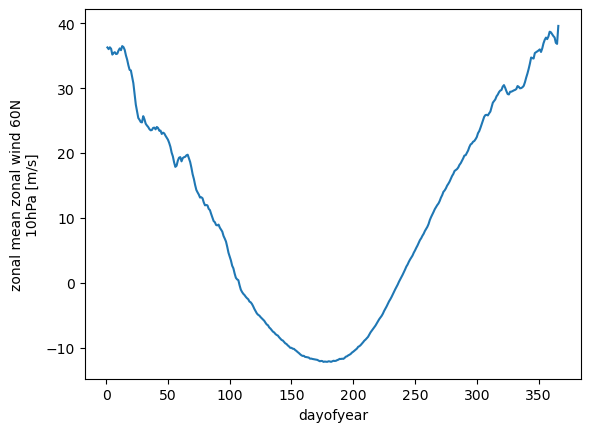

In [5]:
# average annual cycle
annual_cycle = ds['U'].groupby('date.dayofyear').mean('date')
annual_cycle.plot()
plt.show()

In [6]:
# save to netcdf
ds.to_netcdf('../merra-2/merra_60N_10hPa.nc', mode='w')

In [7]:
!ncdump -h ../merra-2/merra_60N_10hPa.nc

netcdf merra_60N_10hPa {
dimensions:
	date = 15551 ;
variables:
	int64 date(date) ;
		date:units = "days since 1979-01-01 00:00:00" ;
		date:calendar = "proleptic_gregorian" ;
	double Tmin(date) ;
		Tmin:_FillValue = NaN ;
		Tmin:units = "K" ;
		Tmin:long_name = "Minimum temperature 50-90 N 10 hPa" ;
	double U(date) ;
		U:_FillValue = NaN ;
		U:units = "m/s" ;
		U:long_name = "zonal mean zonal wind 60N 10hPa" ;

// global attributes:
		:source = "MERRA-2" ;
}


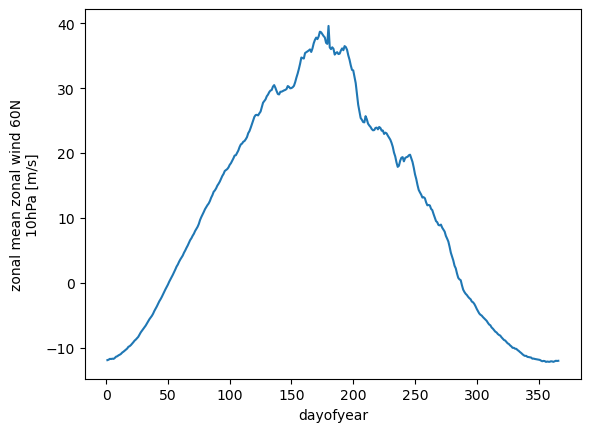

In [8]:
annual_cycle.roll(dayofyear=180, roll_coords=False).plot()
plt.show()

In [9]:
annual_cycle

<xarray.DataArray 'U' (dayofyear: 366)>
array([ 36.2655814 ,  36.00744186,  36.29232558,  36.05976744,
        35.1655814 ,  35.41372093,  35.54046512,  35.24930233,
        35.30581395,  35.79255814,  36.11790698,  35.84186047,
        36.47325581,  36.32372093,  35.89860465,  35.04348837,
        34.38162791,  33.50790698,  32.80860465,  32.73116279,
        31.75116279,  30.77023256,  29.12953488,  27.45651163,
        26.45418605,  25.40674419,  25.12488372,  24.77651163,
        24.72209302,  25.68116279,  25.20186047,  24.52046512,
        24.24232558,  24.02093023,  23.69069767,  23.5072093 ,
        23.54      ,  23.87162791,  23.91534884,  23.65255814,
        24.02      ,  23.8644186 ,  23.44604651,  23.46325581,
        22.94325581,  23.1444186 ,  23.03      ,  22.67930233,
        22.3855814 ,  22.06232558,  21.57395349,  20.96348837,
        20.06744186,  19.48511628,  18.5655814 ,  17.87162791,
        18.0455814 ,  18.82186047,  19.28093023,  19.37418605,
        18.72302326,  19.22162791,  19.35883721,  19.4255814 ,
        19.6544186 ,  19.74581395,  19.18372093,  18.61744186,
        17.74255814,  16.73023256,  16.01209302,  15.08860465,
        14.31883721,  13.93976744,  13.60046512,  13.14302326,
        13.19534884,  13.03651163,  12.40186047,  11.94953488,
...
        19.1797619 ,  19.61952381,  19.66738095,  20.03619048,
        20.3997619 ,  20.93357143,  21.32452381,  21.46071429,
        21.74214286,  21.85785714,  22.12857143,  22.4597619 ,
        23.06357143,  23.3802381 ,  23.89357143,  24.4652381 ,
        25.06142857,  25.58309524,  25.85333333,  25.88666667,
        25.79738095,  26.11833333,  26.38833333,  27.08357143,
        27.75857143,  28.01595238,  28.26428571,  28.74190476,
        29.00166667,  29.3847619 ,  29.625     ,  29.70857143,
        30.23380952,  30.4652381 ,  30.04952381,  29.53095238,
        29.08809524,  29.02952381,  29.44      ,  29.45      ,
        29.55142857,  29.65214286,  29.72928571,  29.85904762,
        30.32357143,  30.19857143,  29.97095238,  30.01285714,
        30.13833333,  30.35404762,  30.91119048,  31.61880952,
        32.23833333,  32.96095238,  33.77285714,  34.71952381,
        34.61928571,  34.55595238,  35.40190476,  35.52809524,
        35.635     ,  35.79547619,  35.97      ,  35.57238095,
        36.11380952,  36.90238095,  37.43595238,  37.78261905,
        37.5497619 ,  37.955     ,  38.69380952,  38.6       ,
        38.29928571,  38.02238095,  37.80238095,  36.9797619 ,
        36.815     ,  39.58181818])
Coordinates:
  * dayofyear  (dayofyear) int64 1 2 3 4 5 6 7 8 ... 360 361 362 363 364 365 366
Attributes:
    units:      m/s
    long_name:  zonal mean zonal wind 60N 10hPa